<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Global_Air_Quality_(2025)_6_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("/content/Air_Quality.csv")
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2025-01-01 00:00:00+00:00,Brasilia,325.0,21.1,2.5,35.0,15.4,15.6,20.483337
1,2025-01-01 01:00:00+00:00,Brasilia,369.0,20.8,2.7,35.0,15.1,15.3,20.425000
2,2025-01-01 02:00:00+00:00,Brasilia,419.0,20.4,3.0,34.0,15.6,15.8,20.333332
3,2025-01-01 03:00:00+00:00,Brasilia,451.0,20.5,3.1,33.0,16.4,16.6,20.258335
4,2025-01-01 04:00:00+00:00,Brasilia,458.0,22.1,3.0,29.0,17.7,17.8,20.316668


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO,52560.0,245.269711,146.926588,52.0,155.000000,206.000000,288.000000,1621.00000
NO2,52560.0,24.129863,19.323853,0.0,9.400000,18.900000,33.700000,127.10000
SO2,52560.0,15.485135,24.794611,0.3,1.900000,5.200000,20.400000,478.00000
O3,52560.0,64.416267,35.054135,0.0,41.000000,60.000000,84.000000,288.00000
PM2.5,52560.0,17.246579,15.429194,0.0,5.800000,11.900000,23.500000,104.30000
PM10,52560.0,28.553288,36.877058,0.0,7.600000,14.400000,33.900000,470.30000
AQI,52560.0,41.236672,22.740643,7.6,23.600002,33.475001,59.949994,152.24835


In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df.shape

(52560, 9)

In [71]:
df['City'].nunique()

6

In [72]:
df.columns

Index(['Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI'], dtype='object')

In [73]:
numerical_col = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']

In [74]:
categorical_col ="City"

In [75]:
target_col = "AQI"

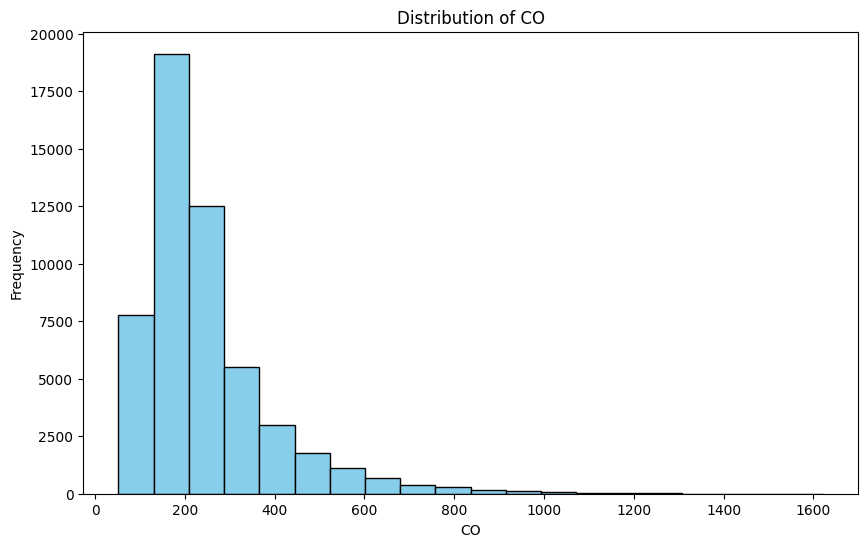

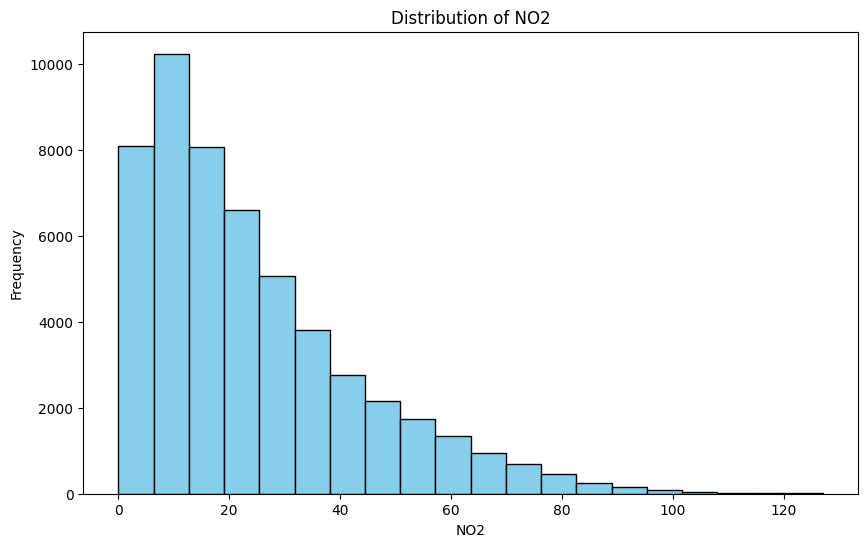

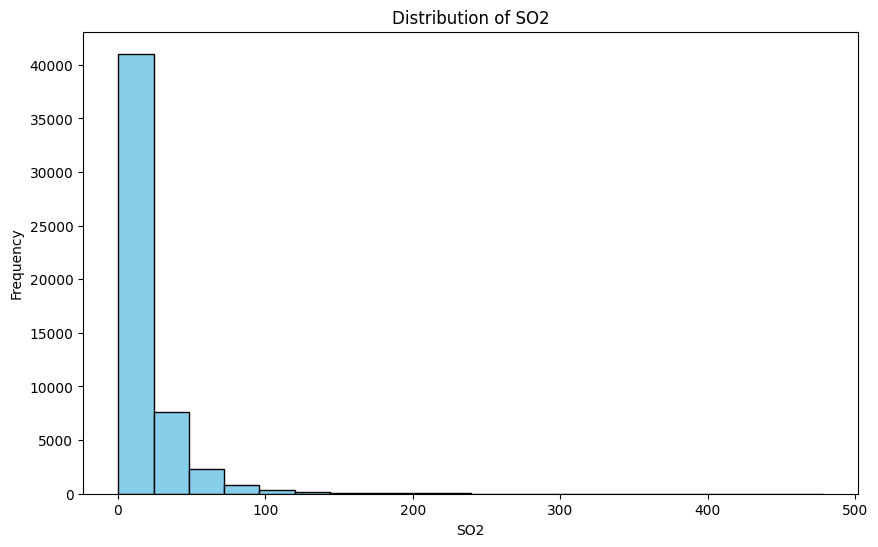

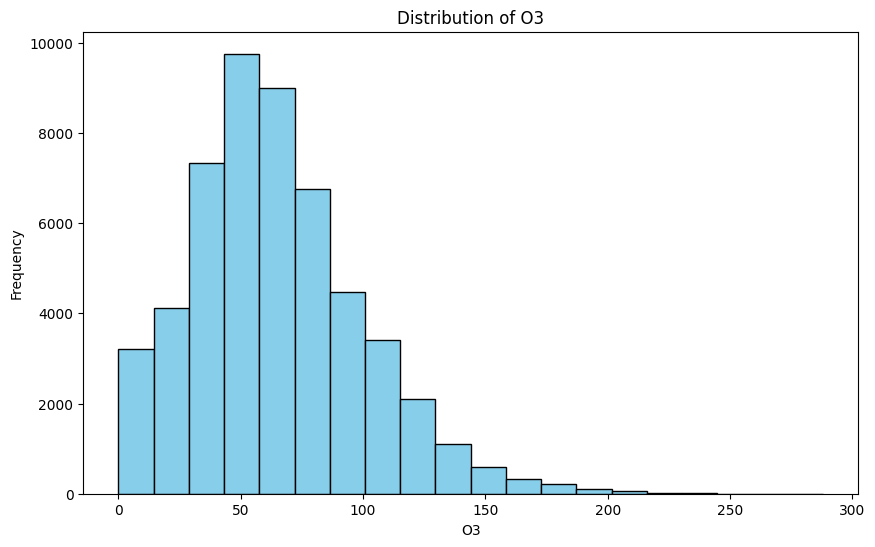

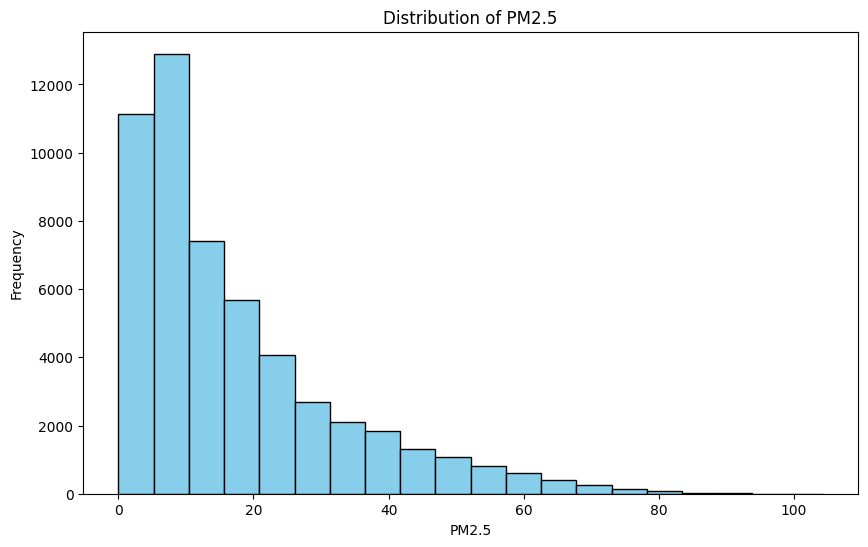

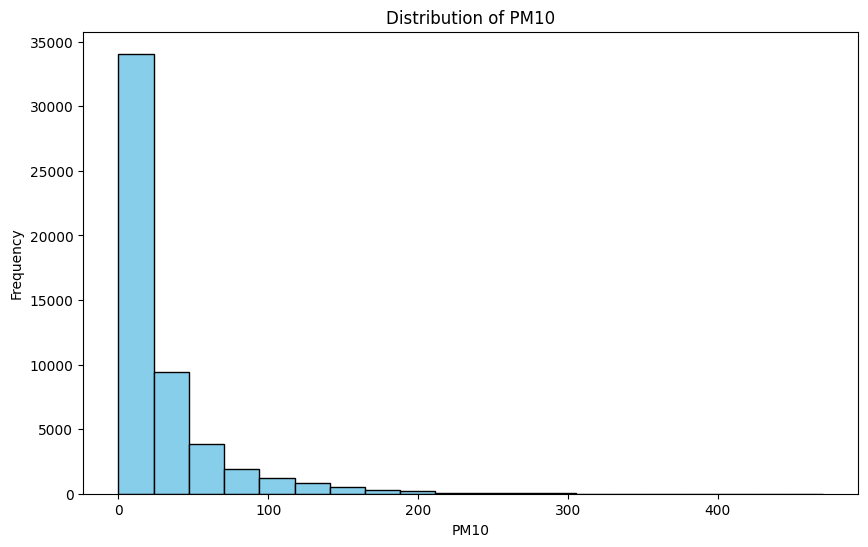

In [76]:
for col in numerical_col:
    plt.figure(figsize=(10,6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

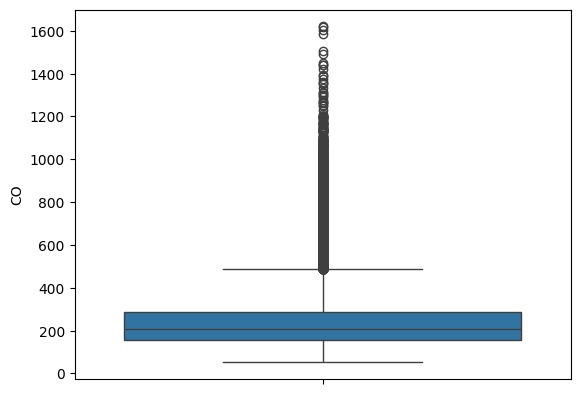

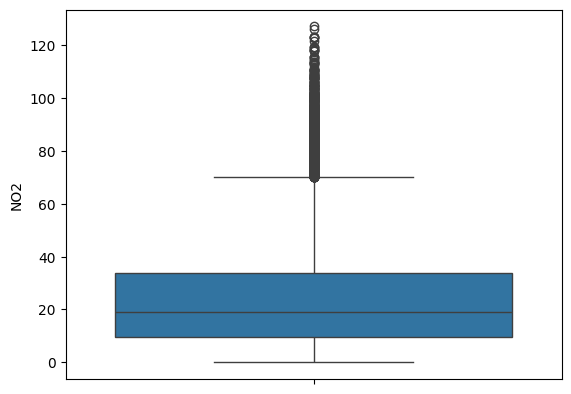

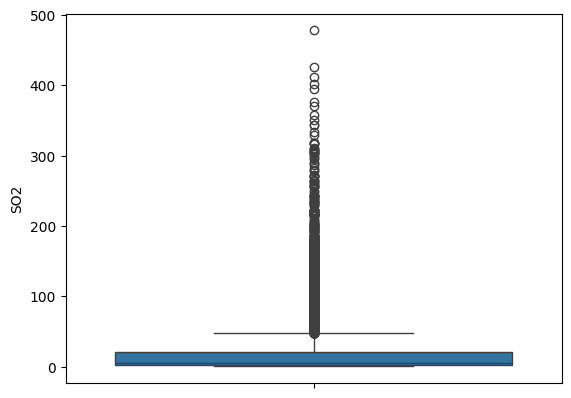

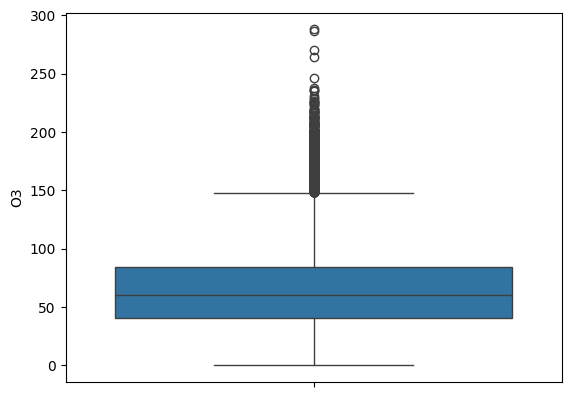

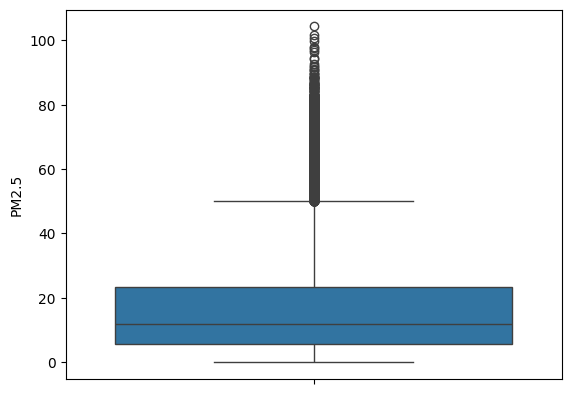

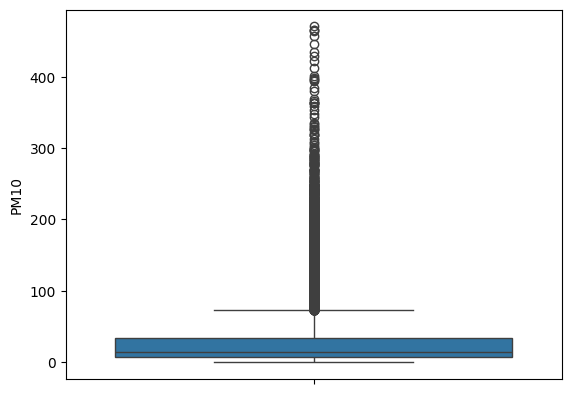

In [77]:
for c in numerical_col:
  sns.boxplot(df[c])
  plt.show()

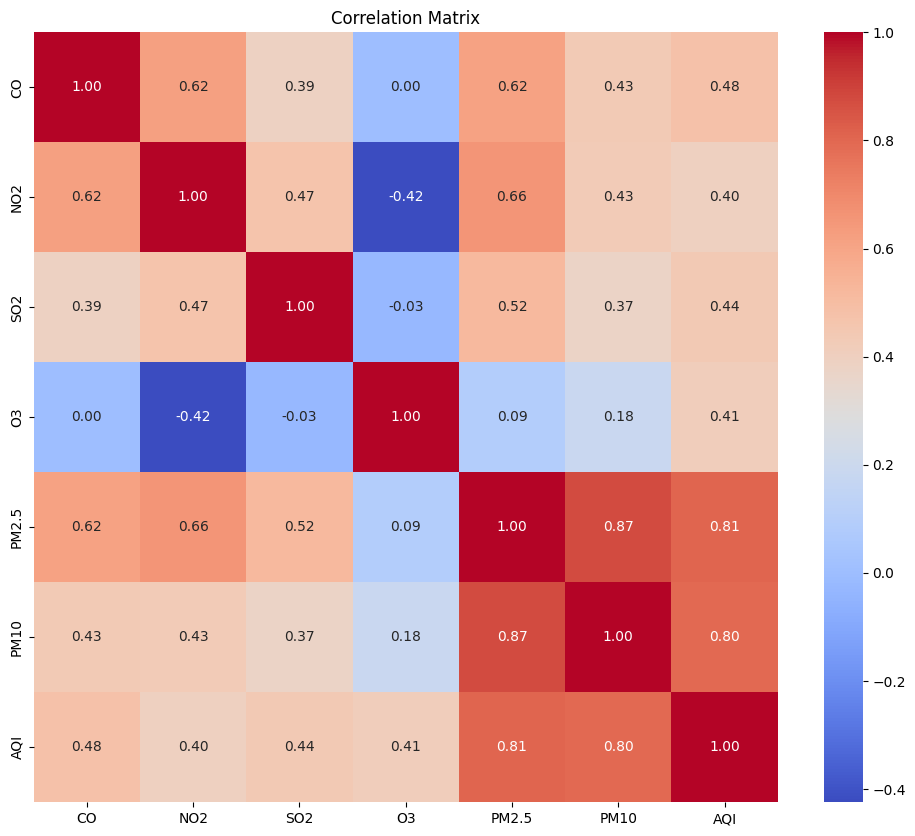

In [78]:
plt.figure(figsize=(12,10))
corr_matric = df[numerical_col +[target_col]].corr()
sns.heatmap(corr_matric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


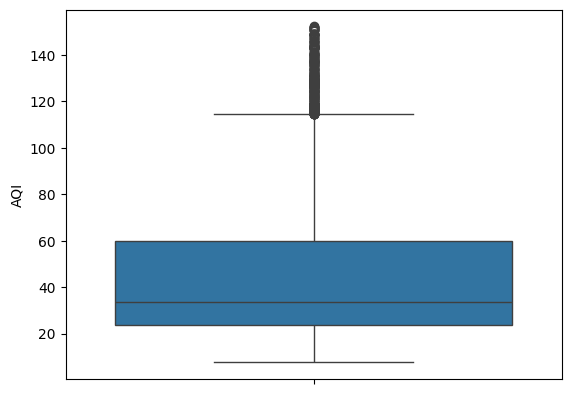

In [79]:
sns.boxplot(df[target_col])
plt.show()

In [80]:
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
print(len(outliers))

321


In [81]:
df.columns

Index(['Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI'], dtype='object')

In [82]:
outlier_cols = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10','AQI']



In [83]:
for col in outlier_cols:
    # check for negative values
    if (df[col] < 0).any():
        print(f"Warning: Negative values in {col}, can't apply log directly")
    else:
        df[col] = np.log1p(df[col])  # log(1+x) transformation


In [84]:
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2025-01-01 00:00:00+00:00,Brasilia,5.786897,3.095578,1.252763,3.583519,2.797281,2.809403,3.067278
1,2025-01-01 01:00:00+00:00,Brasilia,5.913503,3.081910,1.308333,3.583519,2.778819,2.791165,3.064558
2,2025-01-01 02:00:00+00:00,Brasilia,6.040255,3.063391,1.386294,3.555348,2.809403,2.821379,3.060271
3,2025-01-01 03:00:00+00:00,Brasilia,6.113682,3.068053,1.410987,3.526361,2.856470,2.867899,3.056749
4,2025-01-01 04:00:00+00:00,Brasilia,6.129050,3.139833,1.386294,3.401197,2.928524,2.933857,3.059489


In [85]:
df.drop(columns=['Date'],inplace=True)

In [86]:
df.head()

,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,Brasilia,5.786897,3.095578,1.252763,3.583519,2.797281,2.809403,3.067278
1,Brasilia,5.913503,3.081910,1.308333,3.583519,2.778819,2.791165,3.064558
2,Brasilia,6.040255,3.063391,1.386294,3.555348,2.809403,2.821379,3.060271
3,Brasilia,6.113682,3.068053,1.410987,3.526361,2.856470,2.867899,3.056749
4,Brasilia,6.129050,3.139833,1.386294,3.401197,2.928524,2.933857,3.059489


In [91]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['City']   # categorical column name

ohe = OneHotEncoder(
    sparse_output=False,   # array instead of sparse matrix
    drop='first',          # dummy variable trap avoid
    handle_unknown='ignore'
)

encoded_array = ohe.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(cat_cols),
    index=df.index
)

# replace original column
df = pd.concat([df.drop(cat_cols, axis=1), encoded_df], axis=1)



In [92]:
df.head()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI,City_Cairo,City_Dubai,City_London,City_New York,City_Sydney
0,5.786897,3.095578,1.252763,3.583519,2.797281,2.809403,3.067278,0.0,0.0,0.0,0.0,0.0
1,5.913503,3.081910,1.308333,3.583519,2.778819,2.791165,3.064558,0.0,0.0,0.0,0.0,0.0
2,6.040255,3.063391,1.386294,3.555348,2.809403,2.821379,3.060271,0.0,0.0,0.0,0.0,0.0
3,6.113682,3.068053,1.410987,3.526361,2.856470,2.867899,3.056749,0.0,0.0,0.0,0.0,0.0
4,6.129050,3.139833,1.386294,3.401197,2.928524,2.933857,3.059489,0.0,0.0,0.0,0.0,0.0


In [94]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [110]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


R-squared: 0.7352685256092006
Mean Squared Error: 0.06974849824769312
Mean Absolute Error: 0.20900565823454223


In [115]:
from sklearn.ensemble import RandomForestRegressor

rn = RandomForestRegressor()
rn.fit(X_train_scaled, y_train)
y_pred_rn = rn.predict(X_test_scaled)

In [116]:
print(r2_score(y_test, y_pred_rn))
print(mean_squared_error(y_test, y_pred_rn))
print(mean_absolute_error(y_test, y_pred_rn))

0.9105515416983504
0.023566882825203982
0.09034318697009708


In [117]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print(r2_score(y_test, y_pred_dt))
print(mean_squared_error(y_test, y_pred_dt))
print(mean_absolute_error(y_test, y_pred_dt))

0.8206713976176598
0.04724750140801776
0.1126124075586189
